In [ ]:
!conda install -c conda-forge opencv -y

In [ ]:
# install specific library versions that are compatible 
!pip install opencv-python==4.8.0.74
!pip install pydot graphviz
!pip install numpy==1.24
!pip install visualkeras
!pip install pillow
!pip install pydot
!pip install Pillow==9.5.0

In [2]:
import numpy as np
import os
import glob
import librosa
from tensorflow.keras import models
from tensorflow.keras.applications import VGG16
import librosa.display
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [3]:
def load_audio_data(file_path):
    data = []
    labels = []
    sample_rates = []
    for subfolder in os.listdir(file_path):
        subfolder_path = os.path.join(file_path, subfolder)
        if os.path.isdir(subfolder_path):
            for file in glob.glob(os.path.join(subfolder_path, '*.wav')):
                # Load audio files
                y, sr = librosa.load(file, sr=None)
                data.append(y)
                sample_rates.append(sr)
                labels.append(subfolder)  # Store folder name (animal name) as label
    return data, labels, sample_rates

# Call function to load data
### Datapath must be the parent path with subfolders of species inside ###
data_path = "/Volumes/UGREEN Samsung SSD/project echo audio/test data/Halliday_2_segmented"
audio_data, audio_labels, sample_rates = load_audio_data(data_path)

In [4]:
# Normalize the data.
# brief discription of why to normalise and how it does this
def preprocess_data(data):
    preprocessed_data = []
    for y in data:
        normalized_data = librosa.util.normalize(y)
        preprocessed_data.append(normalized_data)
    
    return preprocessed_data

# Call function for preprocessing
preprocessed_data = preprocess_data(audio_data)

In [5]:
#from tensorflow.keras.models import load_mode

# Load your model
# model = load_model('C:\\Users\\93978\\Documents\\GitHub\\Project-Echo\\Transfer learning\\SWe_OpenL3\\models\\echo_model\\1')
base_model = VGG16(weights='imagenet', include_top=False)

In [6]:
# List the names and indices of all layers
#for i, layer in enumerate(model.layers):
    #print(i, layer.name)
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool


In [7]:
# Take the first audio sample to create a spectrogram
sample = audio_data[0]
sr = sample_rates[0]  

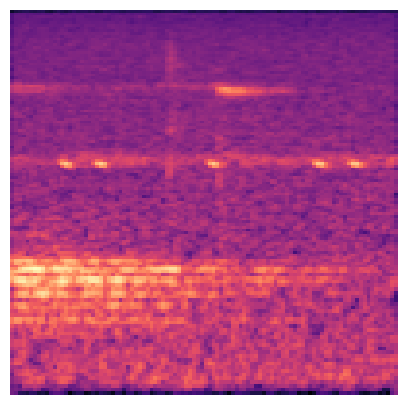

In [8]:
# Take the first audio sample to create a spectrogram
sample = audio_data[0]
sr = sample_rates[0]  

# Generate mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=sample, sr=sr, n_mels=128)

# Convert to log mel spectrogram
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Convert spectrogram to RGB image
fig = plt.figure(figsize = (5,5), frameon=False) #remove outside frame
plt.tight_layout(pad=0)
img = librosa.display.specshow(
    log_mel_spectrogram,sr=sr, x_axis='time', y_axis='mel')
plt.axis("off")

# save image
plt.savefig('spectrogram.png', bbox_inches='tight', pad_inches=0) # remove transparent space aroung image
plt.show()

plt.close()

# Reading images using cv2
pixels = cv2.imread('spectrogram.png')

# Resize the image to match the input dimensions of VGG16
pixels = cv2.resize(pixels, (224, 224))



1/1 [==============================] - 0s 21ms/step


<Figure size 640x480 with 0 Axes>

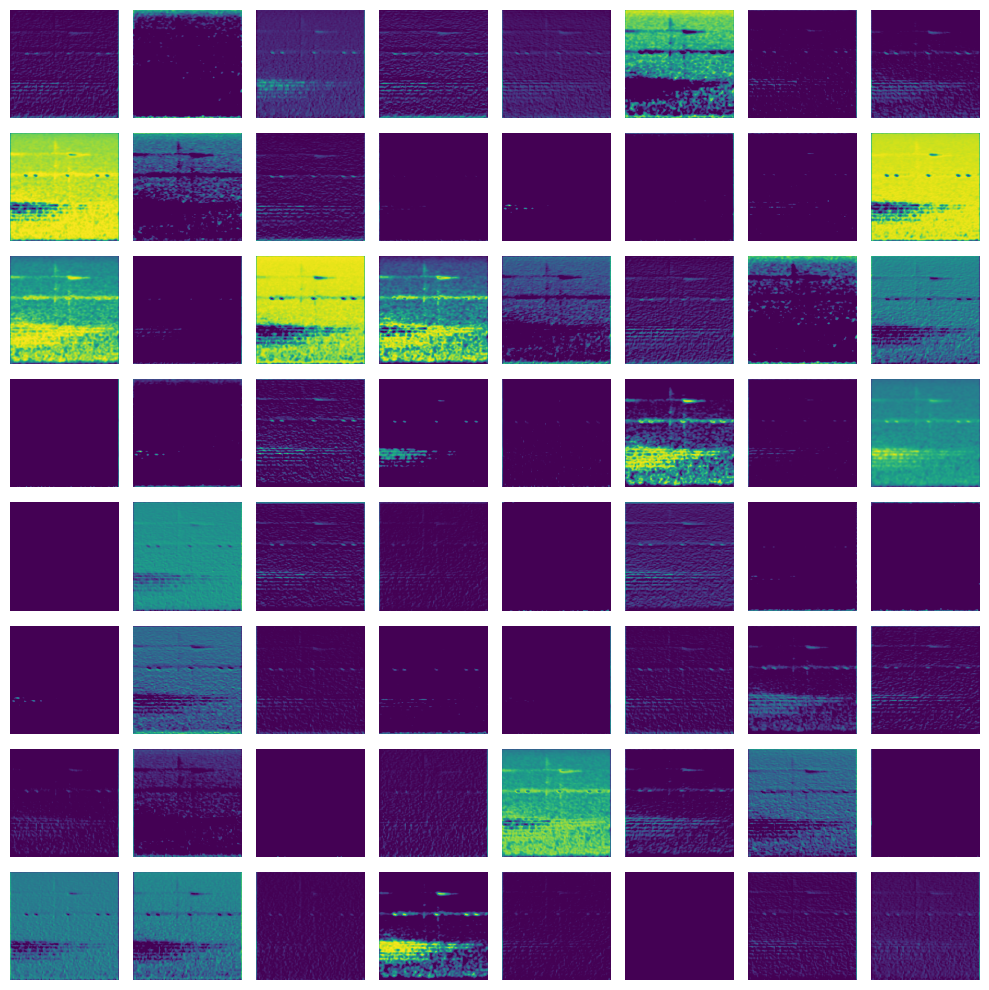

In [15]:
# Extract the output of a specific layer
layer_outputs = [base_model.get_layer('block1_conv1').output]  # Please replace with the name of the layer of your choice

# Create a model that outputs the output of these layers given an input image
activation_model = models.Model(inputs=base_model.input, outputs=layer_outputs)

# Choose an input sample and prepare it 
input_sample = np.expand_dims(pixels, axis=0)  # Replace with your preprocessed data, reshaped to the appropriate input size for VGG16 (224, 224, 3)

# Get feature map
feature_maps = activation_model.predict(input_sample)

# Visual feature mapping
n_features = feature_maps.shape[-1]  # Get the number of feature maps

# This will be the size of the subplot
size = int(np.ceil(np.sqrt(n_features)))

# the plot has been adjusted to remove axes
plt.tight_layout(pad=0)

plt.figure(figsize=(10, 10), frameon=False)
for i in range(n_features):
    plt.subplot(size, size, i+1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')  # Adjust the indices to match the dimensions of the feature maps 
    plt.axis('off')

# Adjust layout to avoid overlap between subplots
plt.tight_layout()

plt.show()

In [10]:
# Please install the Graphviz binaries(https://graphviz.gitlab.io/download/)

In [11]:
# Visualize the base_model
plot_model(base_model, to_file='base_model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


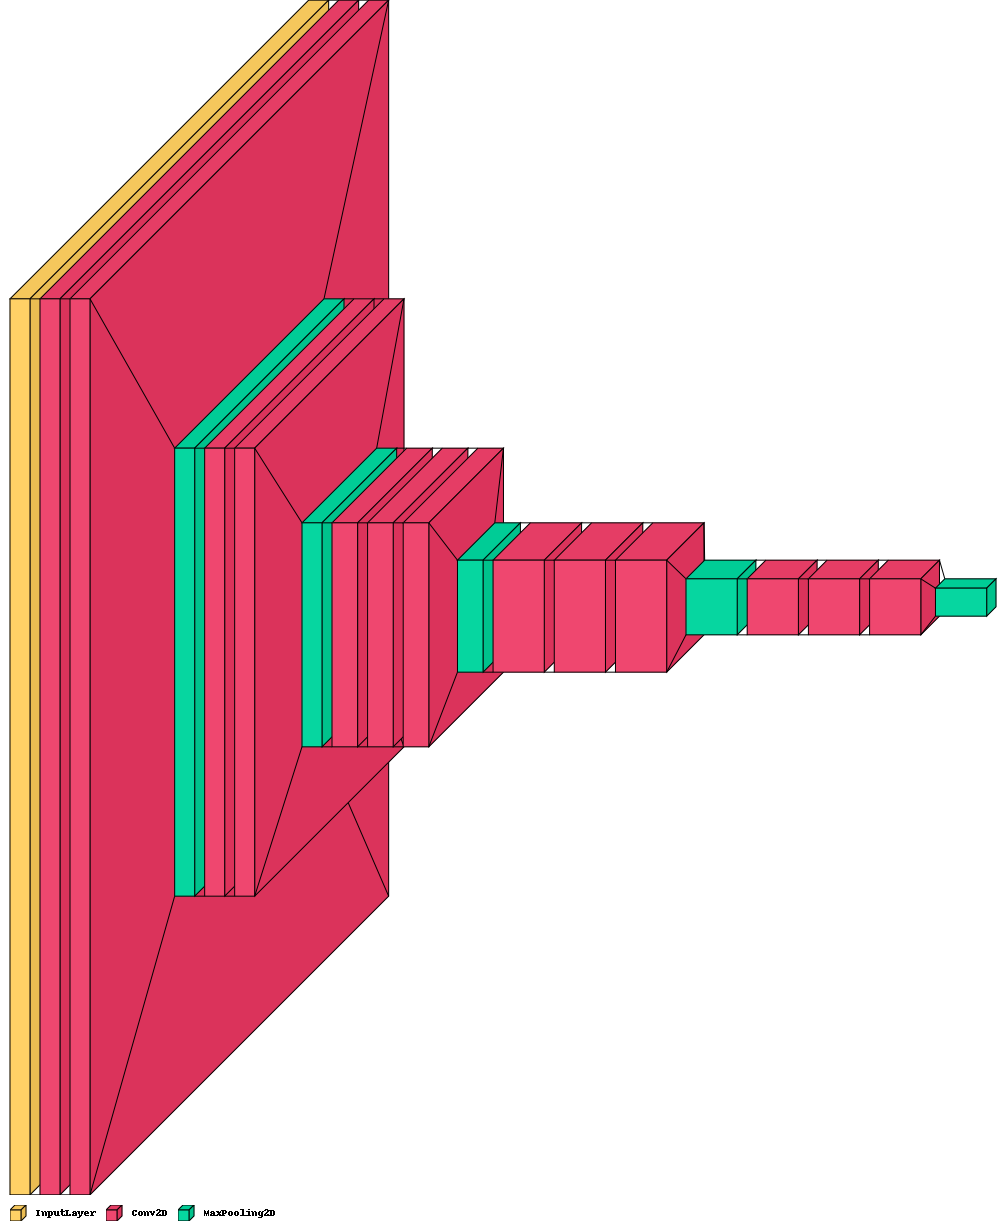

In [12]:
import visualkeras
from PIL import ImageFont
from tensorflow.keras import Input

base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

# Use visualkeras to visualize the model
visualkeras.layered_view(base_model, legend=True)
